In [1]:
# pandas for data manipulation and analysis
import pandas as pd

# matplotlib for creating visualizations
import matplotlib.pyplot as plt

# seaborn for statistical graphics
import seaborn as sns

# numpy for numerical operations
import numpy as np




In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv('hr_employee_churn_data.csv')

# Display the first few rows of the dataset to understand its structure
data.head()


,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,1,0.38,0.53,2,157,3,0,0,low,1
1,2,0.80,0.86,5,262,6,0,0,medium,1
2,3,0.11,0.88,7,272,4,0,0,medium,1
3,4,0.72,0.87,5,223,5,0,0,low,1
4,5,0.37,0.52,2,159,3,0,0,low,1


In [3]:
# Summary statistics for numerical columns
numerical_summary = data.describe()

numerical_summary


,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
count,14999.000000,14997.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7500.000000,0.612863,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,0.238083
std,4329.982679,0.248634,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,0.425924
min,1.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,3750.500000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,7500.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,11249.500000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,14999.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [4]:
# Distribution of the 'salary' column
salary_distribution = data['salary'].value_counts()

# Check for missing values in the dataset
missing_values = data.isnull().sum()

salary_distribution, missing_values


(salary
 low       7316
 medium    6446
 high      1237
 Name: count, dtype: int64,
 empid                    0
 satisfaction_level       2
 last_evaluation          0
 number_project           0
 average_montly_hours     0
 time_spend_company       0
 Work_accident            0
 promotion_last_5years    0
 salary                   0
 left                     0
 dtype: int64)

In [5]:
# Data types of each column
data_types = data.dtypes

# Number of unique values in each column
unique_values = data.nunique()

# Number of missing values in each column
missing_values = data.isnull().sum()

# Most frequent value (mode) for each column
mode_values = data.mode().iloc[0]

data_analysis = pd.DataFrame({
    "Data Type": data_types,
    "Unique Values": unique_values,
    "Missing Values": missing_values,
    "Mode": mode_values
})

data_analysis


,Data Type,Unique Values,Missing Values,Mode
empid,int64,14999,0,1
satisfaction_level,float64,92,2,0.1
last_evaluation,float64,65,0,0.55
number_project,int64,6,0,4.0
average_montly_hours,int64,215,0,135.0
time_spend_company,int64,8,0,3.0
Work_accident,int64,2,0,0.0
promotion_last_5years,int64,2,0,0.0
salary,object,3,0,low
left,int64,2,0,0.0


In [6]:
# Impute missing values in the 'satisfaction_level' column using median imputation
median_value = data['satisfaction_level'].median()
data['satisfaction_level'].fillna(median_value, inplace=True)

# Check if there are any more missing values in the dataset
missing_values_after_imputation = data.isnull().sum()

missing_values_after_imputation


empid                    0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
salary                   0
left                     0
dtype: int64

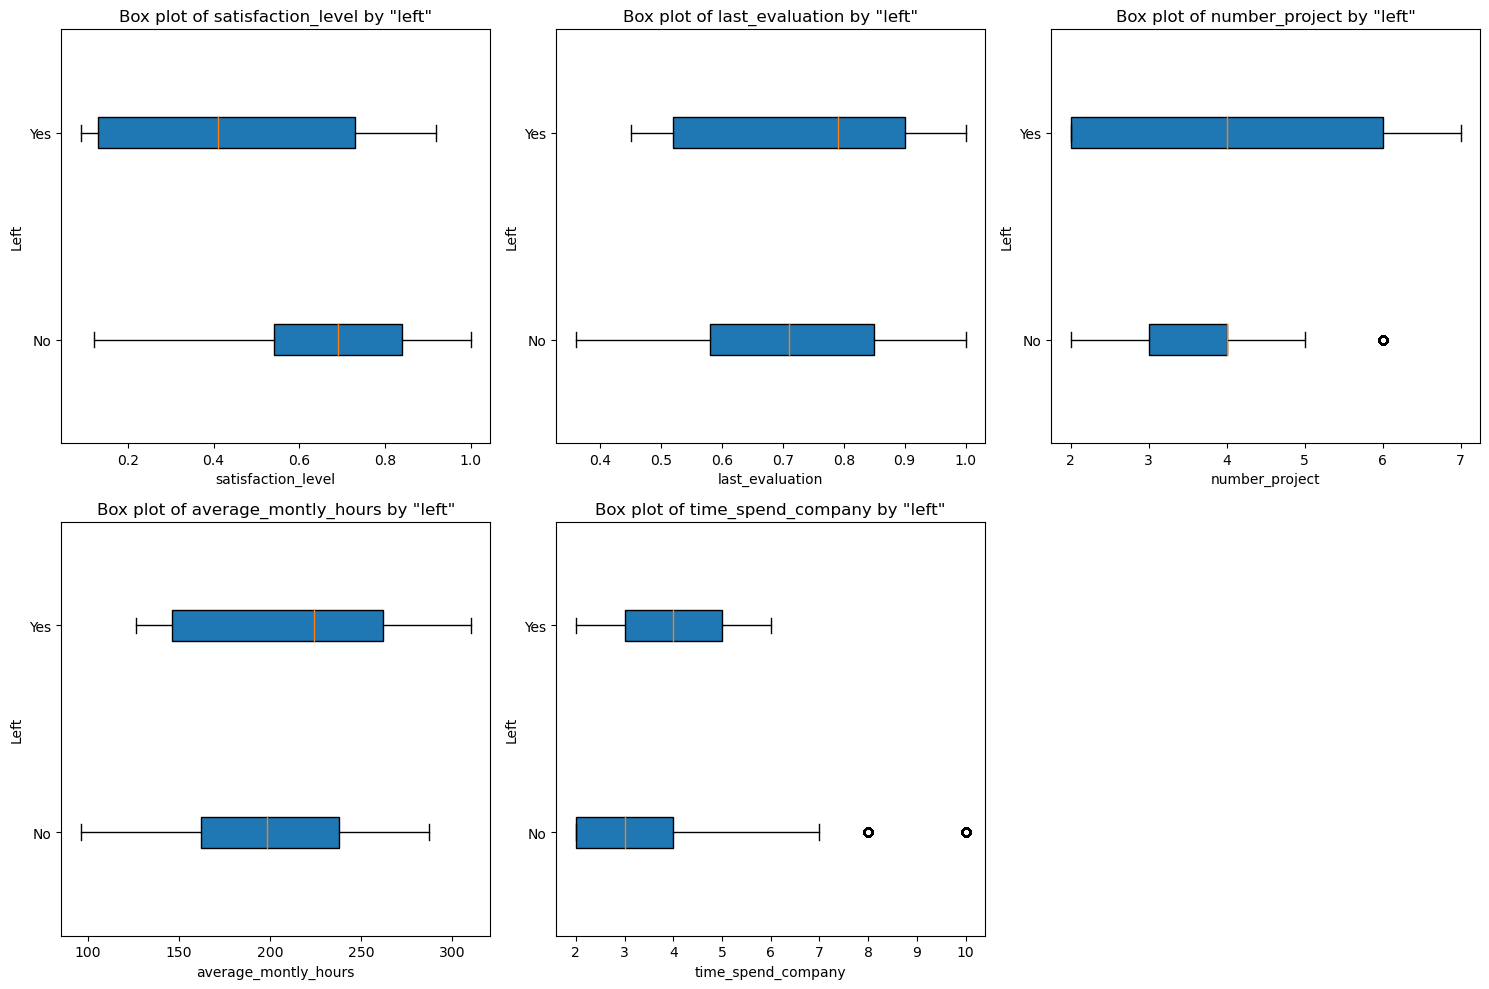

In [7]:
import matplotlib.pyplot as plt

# List of numerical columns
numerical_columns = [
    'satisfaction_level', 'last_evaluation', 'number_project',
    'average_montly_hours', 'time_spend_company'
]

# Set up the matplotlib figure and adjust figure size
plt.figure(figsize=(15, 10))

# Loop through each numerical column and create a box plot
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    plt.boxplot([data[data['left'] == 0][col], data[data['left'] == 1][col]], vert=False, patch_artist=True)
    plt.title(f'Box plot of {col} by "left"')
    plt.xlabel(col)
    plt.ylabel('Left')
    plt.yticks([1, 2], ['No', 'Yes'])
    
plt.tight_layout()
plt.show()


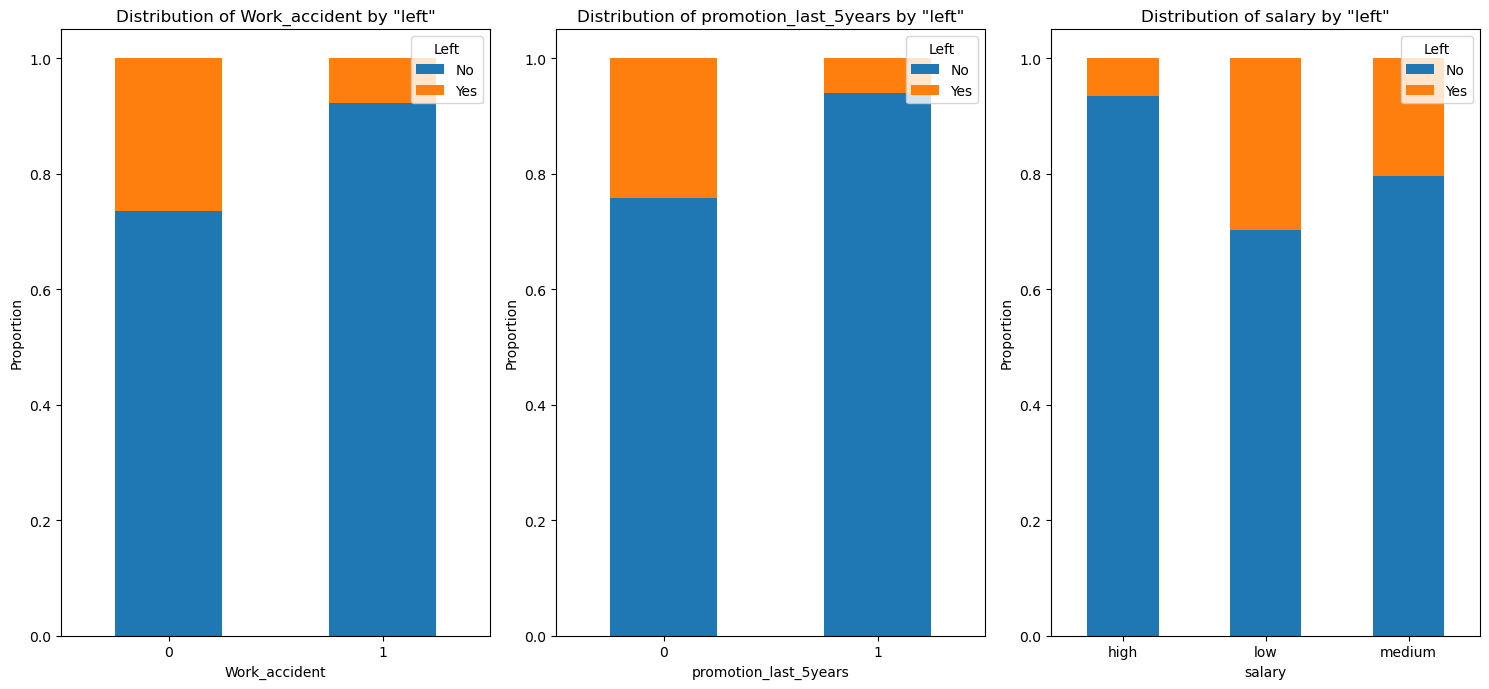

In [8]:
# List of categorical columns
categorical_columns = ['Work_accident', 'promotion_last_5years', 'salary']

# Set up the matplotlib figure and adjust figure size
plt.figure(figsize=(15, 7))

# Loop through each categorical column and create a bar plot
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(1, 3, i)
    data.groupby(col)['left'].value_counts(normalize=True).unstack().plot(kind='bar', ax=plt.gca(), stacked=True)
    plt.title(f'Distribution of {col} by "left"')
    plt.ylabel('Proportion')
    plt.xlabel(col)
    plt.xticks(rotation=0)
    plt.legend(title='Left', loc='upper right', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()


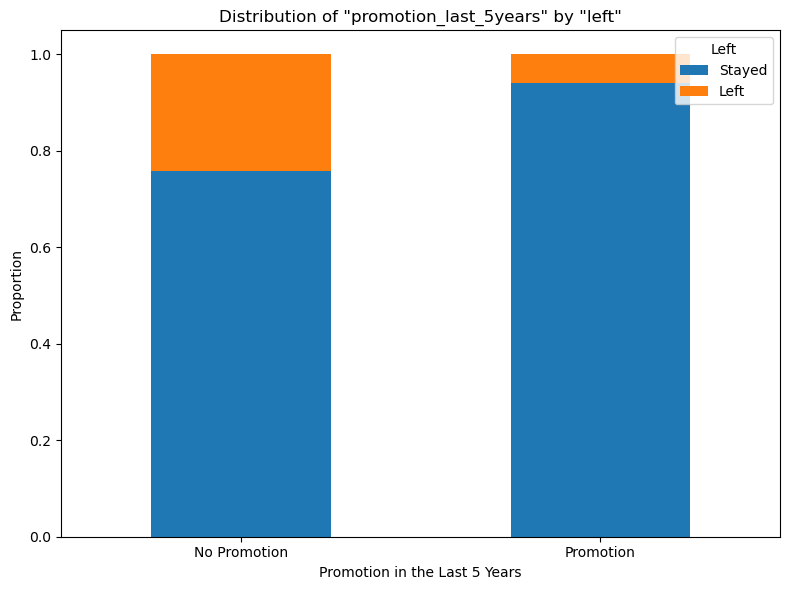

In [9]:
# Set up the matplotlib figure and adjust figure size
plt.figure(figsize=(8, 6))

# Create a bar plot for 'promotion_last_5years' in relation to 'left'
data.groupby('promotion_last_5years')['left'].value_counts(normalize=True).unstack().plot(kind='bar', ax=plt.gca(), stacked=True)
plt.title('Distribution of "promotion_last_5years" by "left"')
plt.ylabel('Proportion')
plt.xlabel('Promotion in the Last 5 Years')
plt.xticks(ticks=[0, 1], labels=['No Promotion', 'Promotion'], rotation=0)
plt.legend(title='Left', loc='upper right', labels=['Stayed', 'Left'])

plt.tight_layout()
plt.show()


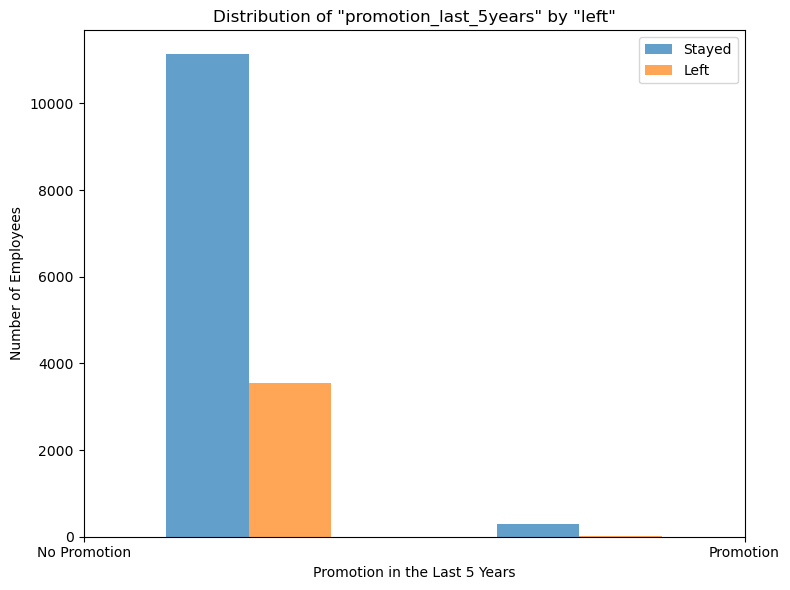

In [10]:
# Set up the matplotlib figure and adjust figure size
plt.figure(figsize=(8, 6))

# Create histograms for employees who left and those who stayed based on their promotion status in the last 5 years
plt.hist([data[data['left'] == 0]['promotion_last_5years'], data[data['left'] == 1]['promotion_last_5years']], 
         bins=2, align='mid', rwidth=0.5, alpha=0.7, label=['Stayed', 'Left'])
plt.title('Distribution of "promotion_last_5years" by "left"')
plt.ylabel('Number of Employees')
plt.xlabel('Promotion in the Last 5 Years')
plt.xticks(ticks=[0, 1], labels=['No Promotion', 'Promotion'])
plt.legend()

plt.tight_layout()
plt.show()


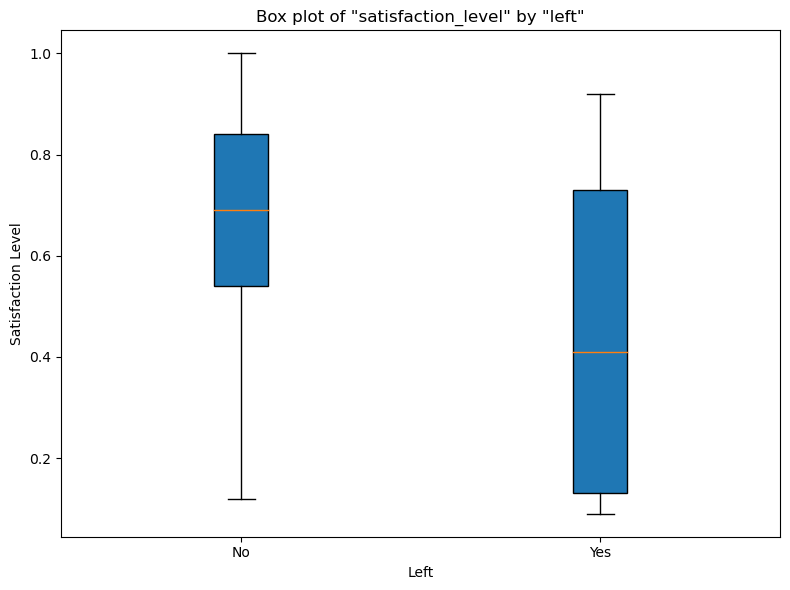

In [11]:
# Set up the matplotlib figure and adjust figure size
plt.figure(figsize=(8, 6))

# Create a box plot for 'satisfaction_level' grouped by 'left'
plt.boxplot([data[data['left'] == 0]['satisfaction_level'], data[data['left'] == 1]['satisfaction_level']], vert=True, patch_artist=True)
plt.title('Box plot of "satisfaction_level" by "left"')
plt.xlabel('Left')
plt.ylabel('Satisfaction Level')
plt.xticks([1, 2], ['No', 'Yes'])

plt.tight_layout()
plt.show()



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


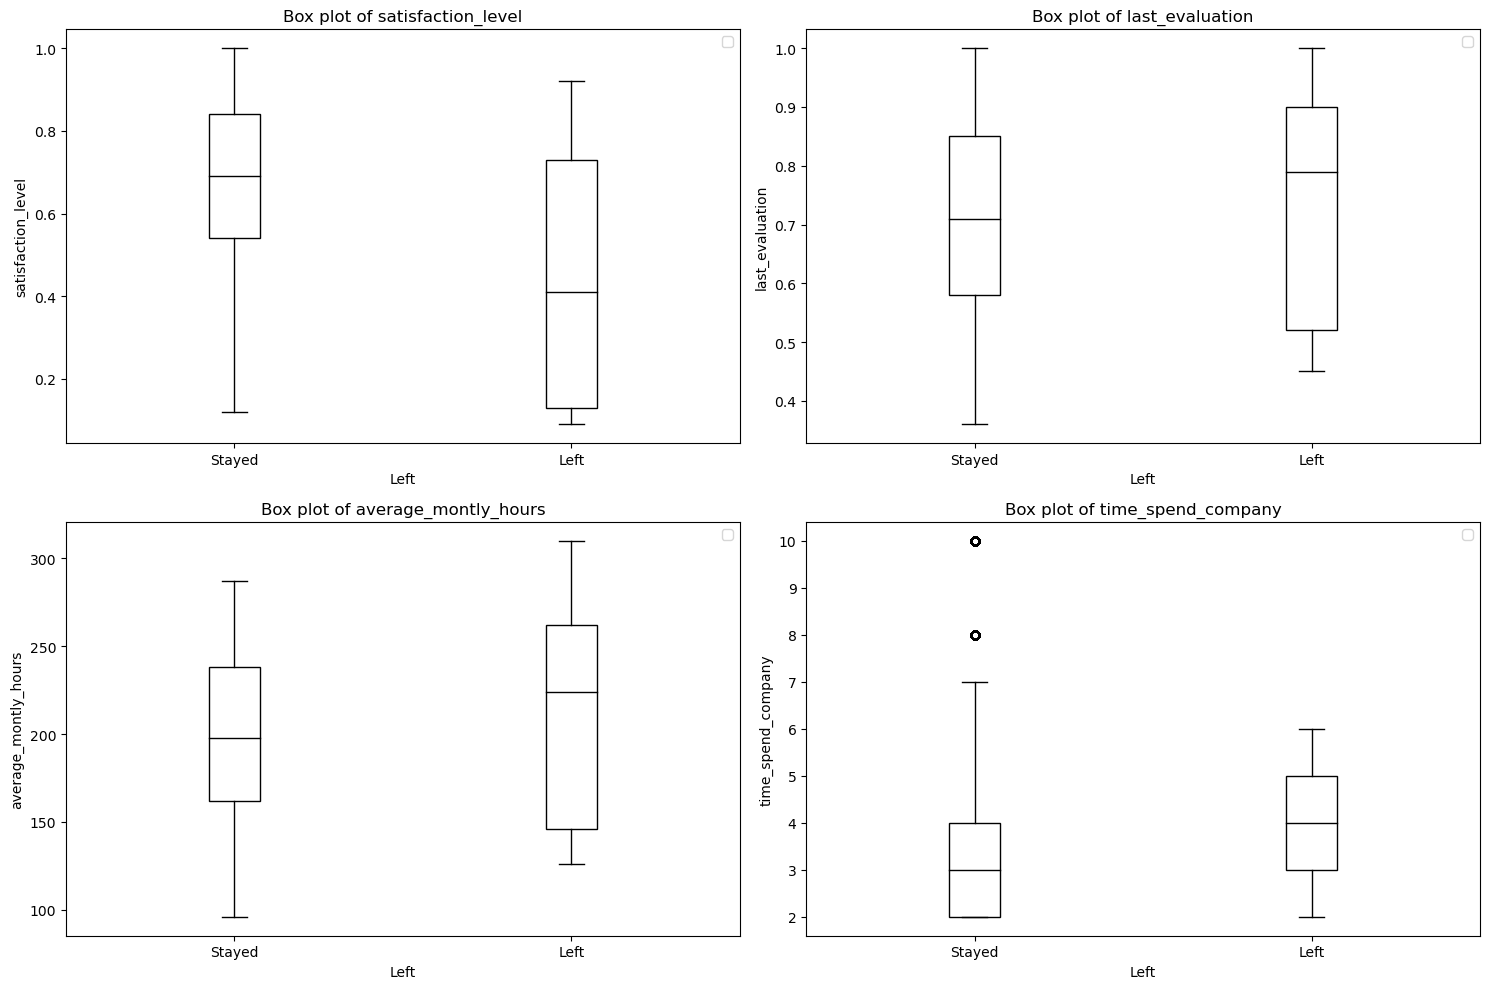

In [12]:
# List of numerical columns for visualization
features_to_plot = [
    'satisfaction_level', 'last_evaluation', 'average_montly_hours', 'time_spend_company'
]

# Set up the matplotlib figure and adjust figure size
plt.figure(figsize=(15, 10))

# Loop through each feature and create a box plot
for i, col in enumerate(features_to_plot, 1):
    plt.subplot(2, 2, i)
    
    # Box plot with distinct colors
    colors = ['lightblue', 'pink']
    boxprops = dict(facecolor='white', edgecolor='black')
    medianprops = dict(color='black')
    plt.boxplot([data[data['left'] == 0][col], data[data['left'] == 1][col]], 
                vert=True, patch_artist=True, boxprops=boxprops, medianprops=medianprops)

    # Assigning distinct colors to the boxes
    for patch, color in zip(plt.gca().artists, colors):
        patch.set_facecolor(color)
    
    plt.title(f'Box plot of {col}')
    plt.xlabel('Left')
    plt.ylabel(col)
    plt.xticks([1, 2], ['Stayed', 'Left'])
    plt.legend(handles=plt.gca().artists, labels=['Stayed', 'Left'], loc='upper right')

plt.tight_layout()
plt.show()


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


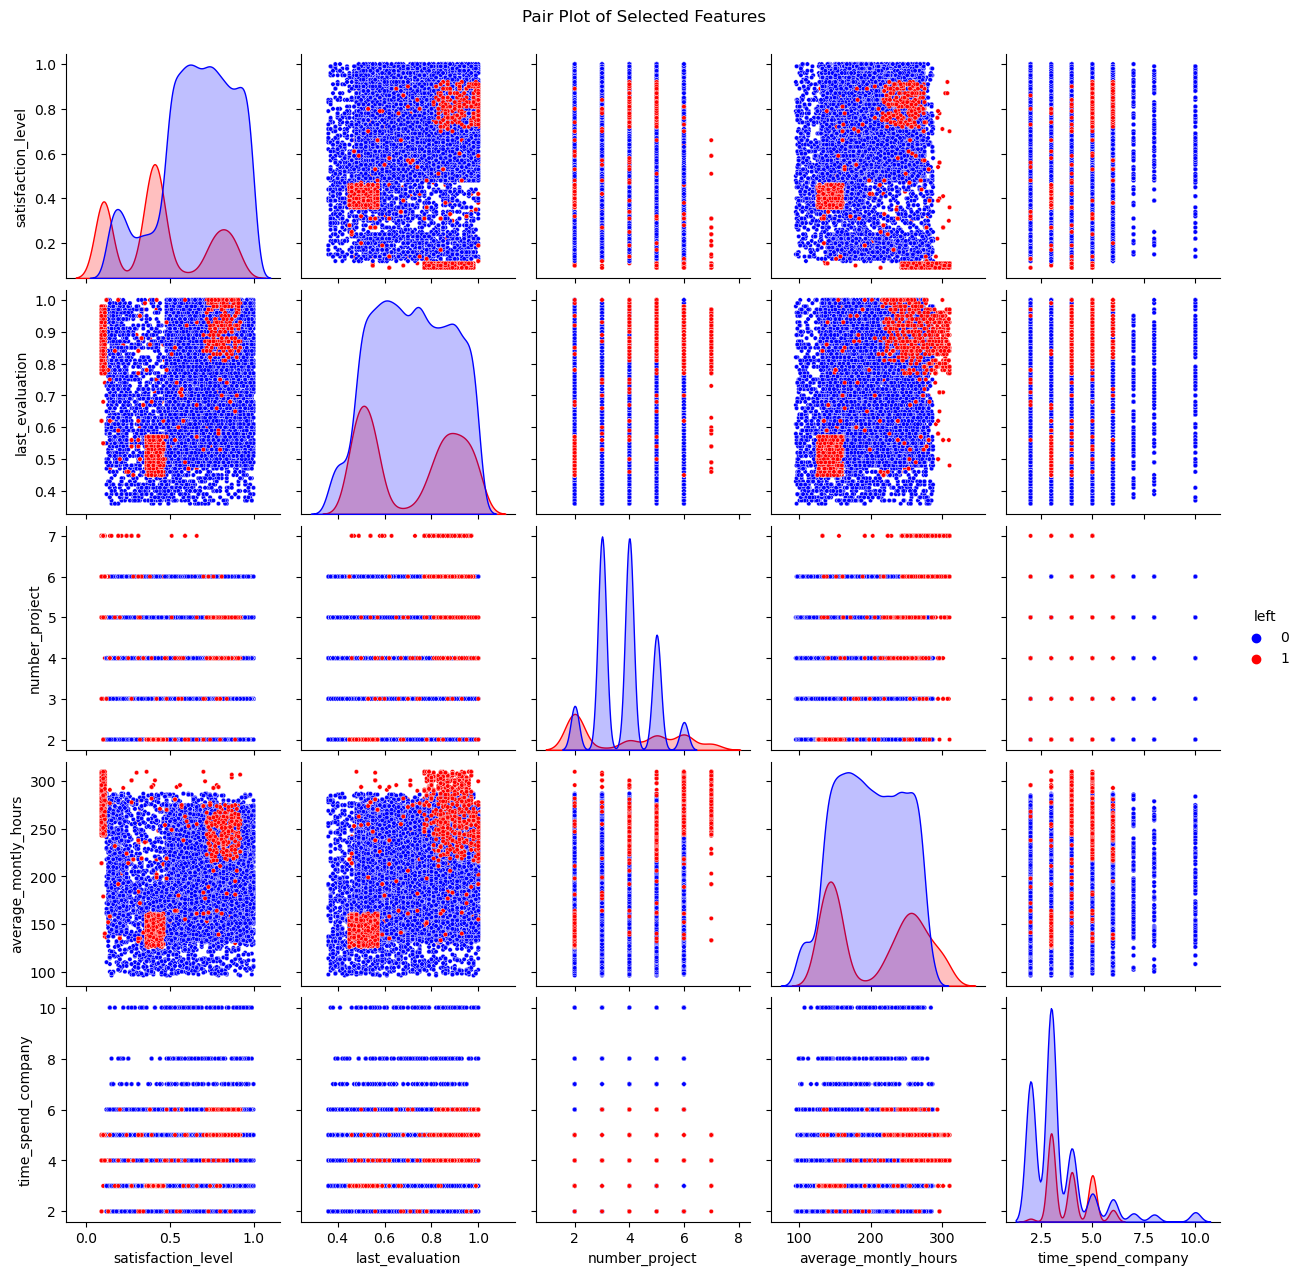

In [13]:
# Subset of features for pair plot
selected_features = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'left']

# Generate pair plot
sns.pairplot(data[selected_features], hue='left', palette={0: 'blue', 1: 'red'}, plot_kws={"s": 10}, diag_kind="kde")
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()



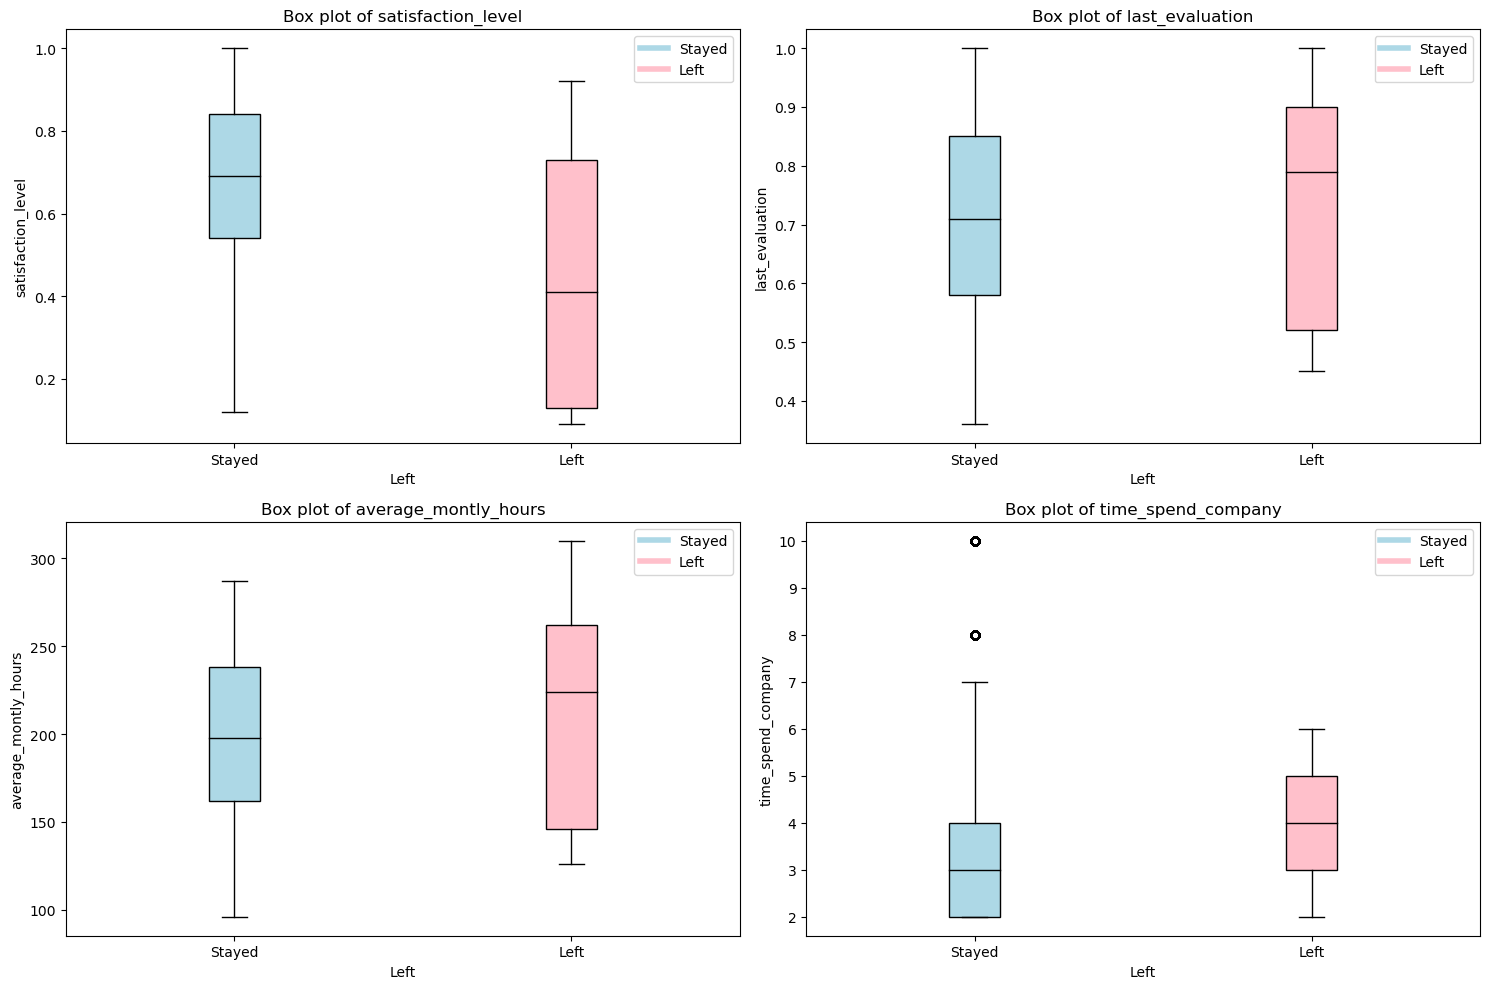

In [14]:
# Set up the matplotlib figure and adjust figure size
plt.figure(figsize=(15, 10))

# Loop through each feature and create a box plot
for i, col in enumerate(features_to_plot, 1):
    plt.subplot(2, 2, i)
    
    # Box plot with distinct colors
    colors = ['lightblue', 'pink']
    boxprops = dict(facecolor='white', edgecolor='black')
    medianprops = dict(color='black')
    bp = plt.boxplot([data[data['left'] == 0][col], data[data['left'] == 1][col]], 
                     vert=True, patch_artist=True, boxprops=boxprops, medianprops=medianprops)

    # Assigning distinct colors to the boxes
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    
    plt.title(f'Box plot of {col}')
    plt.xlabel('Left')
    plt.ylabel(col)
    plt.xticks([1, 2], ['Stayed', 'Left'])

    # Explicitly create legend handles
    handles = [plt.Line2D([0], [0], color=color, lw=4) for color in colors]
    plt.legend(handles=handles, labels=['Stayed', 'Left'], loc='upper right')

plt.tight_layout()
plt.show()


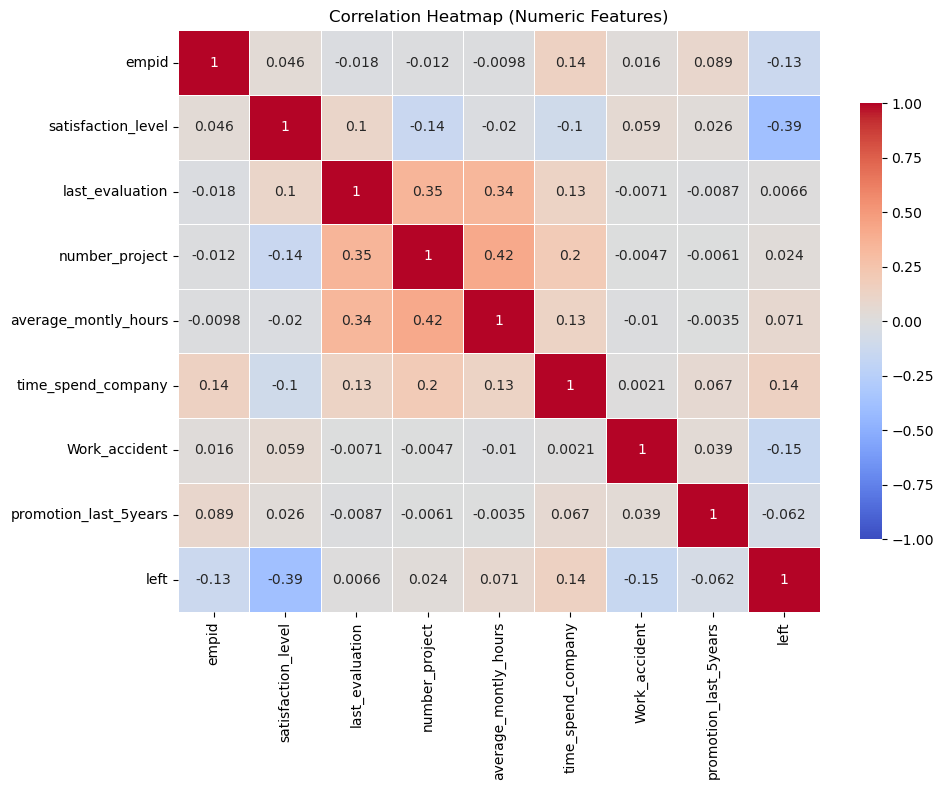

In [15]:
import numpy as np

# Select only numeric columns for the correlation matrix
numeric_data = data.select_dtypes(include=[np.number])

# Calculate the correlation matrix for numeric columns
corr_matrix_numeric = numeric_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Generate a heatmap
sns.heatmap(corr_matrix_numeric, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=.5, cbar_kws={"shrink": 0.75})
plt.title("Correlation Heatmap (Numeric Features)")
plt.tight_layout()
plt.show()


## perform feature engineering by dropping column empid on the copy of dataset


In [16]:
# Create a copy of the dataset
data_copy = data.copy()

# Drop the 'empid' column
data_copy.drop('empid', axis=1, inplace=True)

# Display the first few rows of the updated dataset
data_copy.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,0.38,0.53,2,157,3,0,0,low,1
1,0.80,0.86,5,262,6,0,0,medium,1
2,0.11,0.88,7,272,4,0,0,medium,1
3,0.72,0.87,5,223,5,0,0,low,1
4,0.37,0.52,2,159,3,0,0,low,1


## feature engineering  of categorical data "salary" to numerical data and drop salary column

In [17]:
#update encoding such that salay_low=1 and salary_medium=0

In [18]:
data_copy['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

## drop salary feature as we already performed label encoding on "salary"

In [19]:
salary_dummies= pd.get_dummies(data_copy['salary'],drop_first=True)

In [20]:
salary_dummies

,low,medium
0,True,False
1,False,True
2,False,True
3,True,False
4,True,False
...,...,...
14994,True,False
14995,True,False
14996,True,False
14997,True,False


In [21]:
# add low and medium columns to data_copy dataframe
data_copy= pd.concat([data_copy,salary_dummies],axis=1)
data_copy

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left,low,medium
0,0.38,0.53,2,157,3,0,0,low,1,True,False
1,0.80,0.86,5,262,6,0,0,medium,1,False,True
2,0.11,0.88,7,272,4,0,0,medium,1,False,True
3,0.72,0.87,5,223,5,0,0,low,1,True,False
4,0.37,0.52,2,159,3,0,0,low,1,True,False
...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,low,1,True,False
14995,0.37,0.48,2,160,3,0,0,low,1,True,False
14996,0.37,0.53,2,143,3,0,0,low,1,True,False
14997,0.11,0.96,6,280,4,0,0,low,1,True,False


In [22]:
# now drop salary feature as it is encoded as seperate columns
data_copy.drop(['salary'],inplace=True,axis=1)
data_copy

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left,low,medium
0,0.38,0.53,2,157,3,0,0,1,True,False
1,0.80,0.86,5,262,6,0,0,1,False,True
2,0.11,0.88,7,272,4,0,0,1,False,True
3,0.72,0.87,5,223,5,0,0,1,True,False
4,0.37,0.52,2,159,3,0,0,1,True,False
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,1,True,False
14995,0.37,0.48,2,160,3,0,0,1,True,False
14996,0.37,0.53,2,143,3,0,0,1,True,False
14997,0.11,0.96,6,280,4,0,0,1,True,False


# prepare dataset for regression Analysis into features and target[label column]
# "left" is the target label in this dataset



In [23]:
X=data_copy.drop(labels='left',axis=1)
Y=data_copy['left']


# now we have prepared features as X and Y we have to split the dataset[x,y] to train and test to train our model.

In [44]:
from sklearn.model_selection import train_test_split

# Split the data into a training set and a testing set
#X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [25]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/ee/2c/03d466d00818c8e0ffcf778946ca4a5e05694a11b85bc51f1bc5c18ca54e/xgboost-2.0.1-py3-none-manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 796.3 kB/s eta 0:00:0000:0100:01


## we will try 2 models randomforestclassifier and xgb classifier models
## perform hypertuning on both models and validate prformance

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier


In [27]:
import xgboost
print(xgboost.__version__)


2.0.1


# perform hyperparameter tuning to find best parametrs that give best result for both the models

In [28]:
#combined dictionary for both the RandomForest and XGBoost model parameters.for hyperparameter tuning
#create param
model_param = {
    'RandomForestClassifier': {
        'model': RandomForestClassifier(),
        'param': {
            'n_estimators': [10, 50, 100, 130],
            'criterion': ['gini', 'entropy'],
            'max_depth': range(2, 4),
            'max_features': ['auto', 'log2']
        }
    },
    'XGBClassifier': {
        'model': XGBClassifier(objective='binary:logistic'),
        'param': {
            'learning_rate': [0.5, 0.1, 0.01, 0.001],
            'max_depth': [3, 5, 10, 20],
            'n_estimators': [10,50, 100, 200]
        }
    }
}
        


In [45]:
scores = []

for model_name, mp in model_param.items():
    model_selection = GridSearchCV(estimator=mp['model'], param_grid=mp['param'], cv=5, return_train_score=False)
    model_selection.fit(X, Y)
    
    scores.append({
        'model': model_name,
        'best_score': model_selection.best_score_,
        'best_params':model_selection.best_params_
    })


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py", line 637, in _valida

# baaed on below output after tuning the model xgbclassifier model with best score of 0.98858 is better than randomforest

In [38]:
scores

[{'model': 'RandomForestClassifier',
  'best_score': 0.917527909303101,
  'best_params': {'criterion': 'gini',
   'max_depth': 3,
   'max_features': 'log2',
   'n_estimators': 130}},
 {'model': 'XGBClassifier',
  'best_score': 0.9907328442814272,
  'best_params': {'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 200}}]

# Assuming you have X_train, y_train as your training data
##Prompt
##generate code to iterate through the model using test test data and hyperparameter tuning data to find best fit model 
#using gridsearchCV and store result to scores array
scores = []

for model_name, mp in model_param.items():
    clf = GridSearchCV(mp['model'], mp['param'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

# Printing the results
for score in scores:
    print(score)






#  INITIALISE XGBCLASSIFIER MODEL AND TRAIN THE MODEL

In [46]:
import xgboost as xgb

# Initialize XGBoost classifier
model_xgb = xgb.XGBClassifier(
    objective='binary:logistic',  # Objective function for binary classification
    learning_rate=0.1,           # Step size shrinkage used in updates to prevent overfitting
    max_depth=20,                 # Maximum depth of a tree
    n_estimators=200,            # Number of boosting rounds (trees to be constructed)
    verbosity=1,                 # Printing mode. Set to 0 for silent mode.
    
)


# Train the classifier on your data test data:

In [48]:

model_xgb.fit(X_train, y_train)

 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [49]:
model_xgb.score(X_train, y_train)

0.9998333194432869

In [50]:
X_test.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,low,medium
1670,0.44,0.57,2,141,3,0,0,False,True
13378,0.55,0.96,3,194,3,0,0,False,True
10233,0.72,0.67,5,210,2,0,0,False,True
4719,0.96,0.75,4,177,2,0,0,True,False
7003,0.96,0.54,3,198,3,0,0,True,False


In [54]:
model_xgb.predict(X_test[:2])

array([1, 0])

In [55]:
data.loc[13378]

empid                     13379
satisfaction_level         0.55
last_evaluation            0.96
number_project                3
average_montly_hours        194
time_spend_company            3
Work_accident                 0
promotion_last_5years         0
salary                   medium
left                          0
Name: 13378, dtype: object

In [56]:
data.loc[13378]

empid                     13379
satisfaction_level         0.55
last_evaluation            0.96
number_project                3
average_montly_hours        194
time_spend_company            3
Work_accident                 0
promotion_last_5years         0
salary                   medium
left                          0
Name: 13378, dtype: object

# confusion Matrix

In [57]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, model_xgb.predict(X_test))
cm


array([[2293,    6],
       [  16,  685]])

In [ ]:
# compute F1 Score to measure accuracy of the model

In [58]:
from sklearn.metrics import f1_score

# Assuming you already have y_test and predictions
predictions = model_xgb.predict(X_test)
f1 = f1_score(y_test, predictions)

print("F1-Score:", f1)


F1-Score: 0.9841954022988506


# plot graph to visualise confusion matrix

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you already have y_test and predictions
predictions = model_xgb.predict(X_test)
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Matplotlib is building the font cache; this may take a moment.
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


NameError: name 'model_xgb' is not defined